# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [ ]:
##Load the NLSY dataset
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_theme()

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')

#  Summary statistics

Inspect the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28534 entries, 0 to 28533
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   idcode    28534 non-null  int16   
 1   year      28534 non-null  int8    
 2   birth_yr  28534 non-null  int8    
 3   age       28510 non-null  float64 
 4   race      28534 non-null  category
 5   msp       28518 non-null  float64 
 6   nev_mar   28518 non-null  float64 
 7   grade     28532 non-null  float64 
 8   collgrad  28534 non-null  int8    
 9   not_smsa  28526 non-null  float64 
 10  c_city    28526 non-null  float64 
 11  south     28526 non-null  float64 
 12  ind_code  28193 non-null  float64 
 13  occ_code  28413 non-null  float64 
 14  union     19238 non-null  float64 
 15  wks_ue    22830 non-null  float64 
 16  ttl_exp   28534 non-null  float32 
 17  tenure    28101 non-null  float32 
 18  hours     28467 non-null  float64 
 19  wks_work  27831 non-null  float64 
 20  ln_wag

In [ ]:
data.occ_code.value_counts()

3.0     10974
6.0      4309
8.0      4300
1.0      3008
13.0     1645
2.0      1494
4.0      1323
7.0       571
5.0       438
11.0      194
10.0      144
12.0        7
9.0         6
Name: occ_code, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


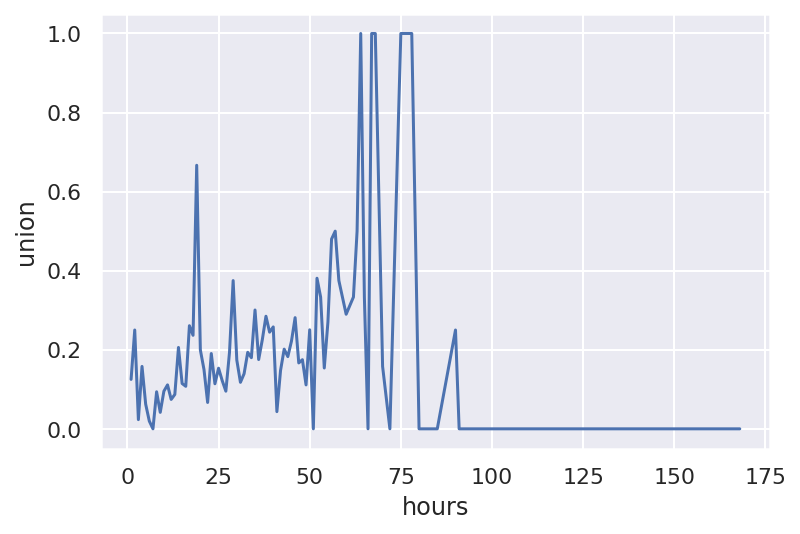

In [ ]:
##Visualize the dataset
x = data['hours']
y = data['union']
sns.lineplot(x, y, ci = None)

In [ ]:
##tabulate college and union status 
data.describe()[['union','collgrad']]

,union,collgrad
count,19238.000000,28534.000000
mean,0.234432,0.168045
std,0.423654,0.373913
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
##generate a variable for log hours worked
data['log_hours'] = np.log(data['hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


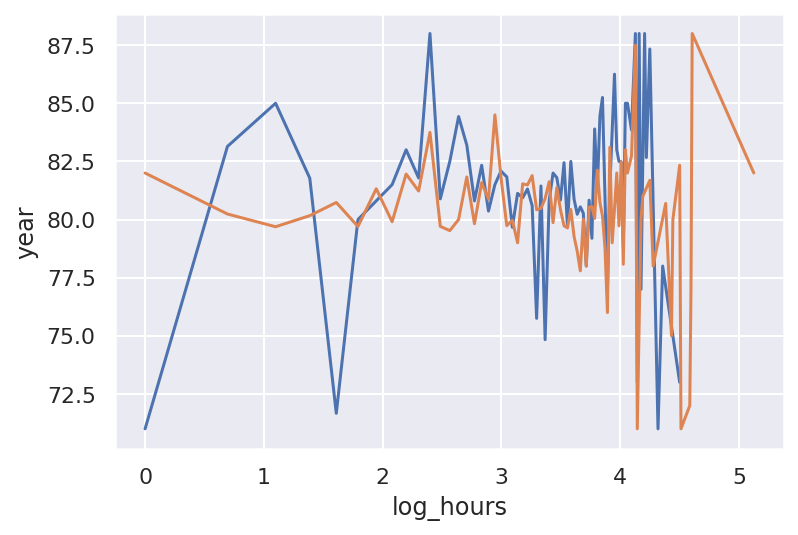

In [ ]:
##plot log hours against year separately for union and non-union
import seaborn as sns
union_data = data[data['union']==1]
non_union_data = data[data['union']==0]
x = union_data['log_hours']
y = union_data['year']
sns.lineplot(x, y, ci = None)
x = non_union_data['log_hours']
y = non_union_data['year']
sns.lineplot(x, y, ci = None)

# Regression: Effect of union status on hours worked

In [ ]:
##Regress hours worked against union status and display the results
res = smf.ols("union ~ hours", data=data).fit()

In [ ]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  union   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.85e-31
Time:                        17:46:55   Log-Likelihood:                -10689.
No. Observations:               19202   AIC:                         2.138e+04
Df Residuals:                   19200   BIC:                         2.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0978      0.012      8.099      0.000       0.074       0.122
hours          0.0037      0.000     11.689      0.000       0.003       0.004
==============================================================================
Omnibus:                     3340.130   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5043.521
Skew:                           1.237   Prob(JB):                         0.00
Kurtosis:                       2.567   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What is the identification assumption for the coefficient on union to be causal?





In [ ]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
data_nomiss = data.dropna(subset=['collgrad', 'union', 'hours'])
res = smf.ols("union ~ hours + C(collgrad)", data=data_nomiss).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  union   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           3.76e-45
Time:                        17:49:31   Log-Likelihood:                -10654.
No. Observations:               19202   AIC:                         2.131e+04
Df Residuals:                   19199   BIC:                         2.134e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0945      0.012      7.830      0.000       0.071       0.118
C(collgrad)[T.1]     0.0638      0.008      8.280      0.000       0.049       0.079
hours                0.0035      0.000     10.880      0.000       0.003       0.004
==============================================================================
Omnibus:                     3309.564   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4995.805
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                       2.575   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## add occupation codes to the regression and compare the results with the previous one
res = smf.ols("union ~ hours + C(collgrad) + C(occ_code)", data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  union   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     118.5
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:24:48   Log-Likelihood:                -9921.6
No. Observations:               19129   AIC:                         1.987e+04
Df Residuals:                   19114   BIC:                         1.999e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1125      0.015      7.440      0.000       0.083       0.142
C(collgrad)[T.1]        0.0002      0.010      0.020      0.984      -0.019       0.019
C(occ_code)[T.2.0]     -0.1273      0.014     -8.820      0.000      -0.156      -0.099
C(occ_code)[T.3.0]      0.0094      0.010      0.901      0.368      -0.011       0.030
C(occ_code)[T.4.0]     -0.1066      0.017     -6.145      0.000      -0.141      -0.073
C(occ_code)[T.5.0]      0.1024      0.024      4.218      0.000       0.055       0.150
C(occ_code)[T.6.0]      0.1912      0.013     15.237      0.000       0.167       0.216
C(occ_code)[T.7.0]     -0.1539      0.026     -5.833      0.000      -0.206      -0.102
C(occ_code)[T.8.0]      0.0076      0.013      0.607      0.544      -0.017       0.032
C(occ_code)[T.9.0]     -0.1789      0.235     -0.761      0.446      -0.639       0.282
C(occ_code)[T.10.0]    -0.1379      0.056     -2.476      0.013      -0.247      -0.029
C(occ_code)[T.11.0]     0.2333      0.040      5.842      0.000       0.155       0.312
C(occ_code)[T.12.0]  2.834e-05      0.182      0.000      1.000      -0.357       0.357
C(occ_code)[T.13.0]     0.3293      0.015     22.629      0.000       0.301       0.358
hours                   0.0022      0.000      6.842      0.000       0.002       0.003
==============================================================================
Omnibus:                     2786.171   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4144.394
Skew:                           1.133   Prob(JB):                         0.00
Kurtosis:                       2.752   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?

When we add occupational code to our regression problem, we observe that the condition number becomes large, indicating that some variables are correlated. Intuitively, college grad and occupational code should be correlated with each other, meaning that we have redundant variables. Hence, it is not a good idea to add the occupational code.

#### What are "good controls" in the dataset in terms of being exogenous to union status?

These could be tenure and nev_mar.

In [ ]:
##add these controls to the regression
res = smf.ols("union ~ hours + C(collgrad) + tenure + nev_mar", data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  union   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     158.7
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          7.33e-134
Time:                        18:26:52   Log-Likelihood:                -10332.
No. Observations:               18966   AIC:                         2.067e+04
Df Residuals:                   18961   BIC:                         2.071e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0696      0.012      5.758      0.000       0.046       0.093
C(collgrad)[T.1]     0.0547      0.008      7.123      0.000       0.040       0.070
hours                0.0025      0.000      7.667      0.000       0.002       0.003
tenure               0.0153      0.001     20.577      0.000       0.014       0.017
nev_mar              0.0143      0.008      1.845      0.065      -0.001       0.029
==============================================================================
Omnibus:                     3089.990   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4619.225
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       2.611   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### How do these change your estimates?

Adding 'tenure' and 'nev_mar' decreases the weight on the previous variables. It also increases the R-squared, which means that it explains more of the proportion of variance in the dependent variable that can be explained by the independent variable.

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article  and write a short paragraph explaining the mistake.**

It's not exactly a news article but: https://www.reddit.com/r/ProgrammerHumor/comments/ersr4g/correlation_between_internet_explorer_usage_and/

Based on this graph, someone can conclude that there is correlation between the internet explorer usage and the murder rates in the US. However, this does not indicate that there is a causality between them. There are other independent variables (or even confounders) not visible in this study that affect these dependent variables and produce these correlation between them. 

